# MESA Summer School


In [53]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()


# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20



Constants defined...


In [54]:
# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

In [55]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16


In [57]:
# Data folder
DATA='./1.0_energy_injection/'  
DATA='./1.0_energy_injection_hires/'
#DATA='./1.0_energy_injection_test/'
#DATA='./'

# HR-Diagrams ( Fig.1a )

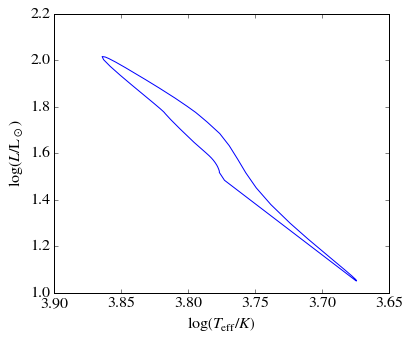

In [61]:

h = mr.MesaData(DATA+'LOGS/'+'history.data')
#h = mr.MesaData(DATA+'history_r5_proper.data')

#h = mr.MesaData(DATA+'history_r10_jupiter.data')
logl=h.log_L
logt=h.log_Teff
plt.plot(logt,logl)
#plt.axis([5.5,3.4, 5, 6.15])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.gca().invert_xaxis()
FILENAME = "figs/HRD.pdf"
plt.savefig(FILENAME)
    

## Lightcurve

545


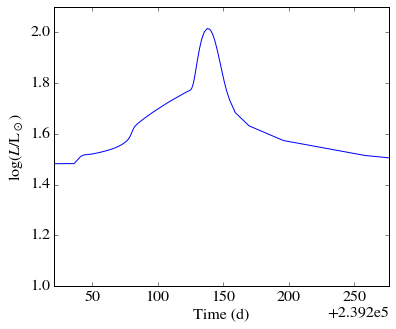

In [60]:
age=(h.star_age-2000)*365.0
plt.plot(age,logl)
print(len(age))

plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])

plt.xlabel(r'Time (d)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
FILENAME = "figs/Lightcurve_zoom.pdf"
plt.savefig(FILENAME)

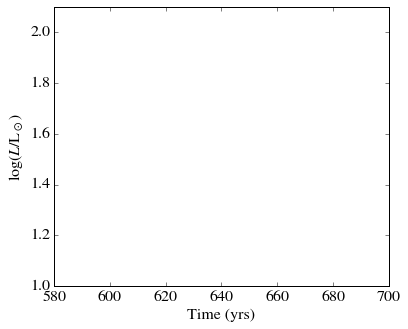

In [32]:
age=(h.star_age-2000)#*365.0
plt.plot(age,logl)
plt.axis([580,700, 1,2.1])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
FILENAME = "figs/Lightcurve.pdf"
plt.savefig(FILENAME)
    


## Radial distance of engulfed planet

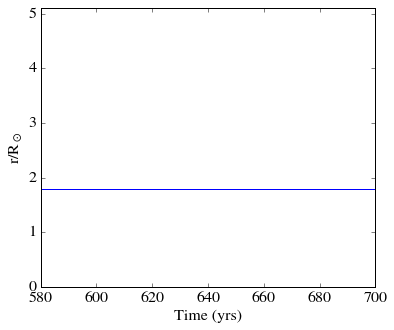

In [33]:
r_e=h.R_Engulfed_Planet
plt.plot(age,r_e)
plt.axis([580,700, 0,5.1])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'r/R$_\odot$')

FILENAME = "figs/R_engulfment.pdf"
plt.savefig(FILENAME)
    

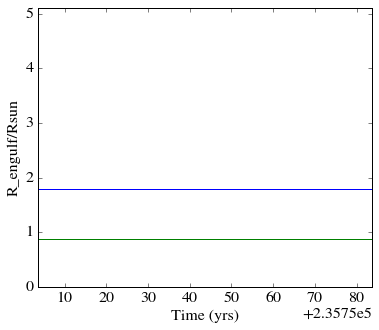

In [34]:
yrd=365
r_e=h.R_Engulfed_Planet
plt.plot(age*yrd,r_e)
plt.plot(age*yrd,logl)
plt.axis([645.9*yrd,646.12*yrd, 0,5.1])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'R_engulf/Rsun')


In [35]:
#r_e=h.R_Engulfed_Planet
#v_orb=h.Orbital_velocity
#D_fac=h.Destruction_factor
#area=h.Engulfed_fraction
#de=h.Injected_energy
#dr=h.Infall_distance

r_e=h.R_Engulfed_Planet
v_orb=h.Orbital_velocity
D_fac=h.Log_Destruction_factor
area=h.Engulfed_fraction
de=h.Log_Injected_energy
dr=h.Log_Infall_distance

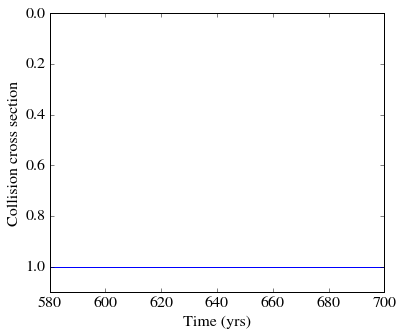

In [36]:
age=(h.star_age-2000)#*365.0
plt.plot(age,area)
plt.axis([580,700, 1.1,0])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'Collision cross section')

FILENAME = "figs/area.pdf"
plt.savefig(FILENAME)
    

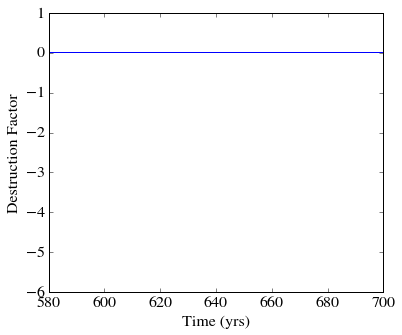

In [37]:
age=(h.star_age-2000)#*365.0
plt.plot(age,D_fac)
plt.axis([580,700, -6,1])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'Destruction Factor')

FILENAME = "figs/destruction_factor.pdf"
plt.savefig(FILENAME)
    

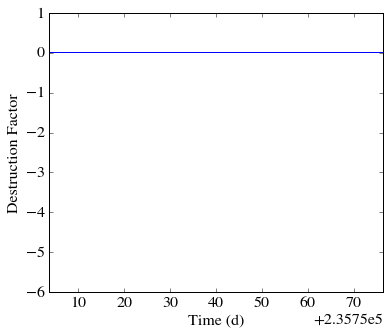

In [38]:
age=(h.star_age-2000)*365.0
plt.plot(age,D_fac)
plt.axis([235753.5,235826.5, -6,1])
plt.xlabel(r'Time (d)')
plt.ylabel(r'Destruction Factor')





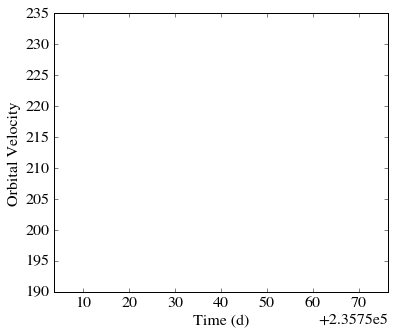

In [39]:
age=(h.star_age-2000)*365.0
plt.plot(age,v_orb)
plt.axis([235753.5,235826.5,190,235])
plt.xlabel(r'Time (d)')
plt.ylabel(r'Orbital Velocity')

9.07019917609e+43
6.327139121495329e+44
0.143353876087


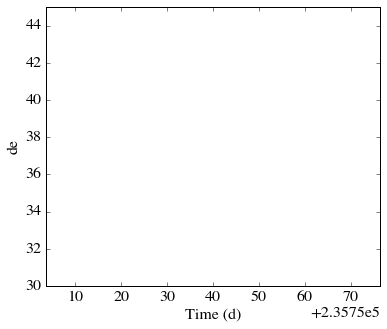

In [40]:
age=(h.star_age-2000)*365.0
plt.plot(age,de)
plt.axis([235753.5,235826.5,30,45])
plt.xlabel(r'Time (d)')
plt.ylabel(r'de')
#print(de)
i=0
total_injected_energy=sum(10**de) 
print(total_injected_energy)
G=6.674e-8
m1=1*1.989e33
m2=0.001*1.989e33
a=3*6.955e10
orbital_energy= G*m1*m2/(2*a)
print(orbital_energy)
print(total_injected_energy/orbital_energy)

9.07019917609e+43


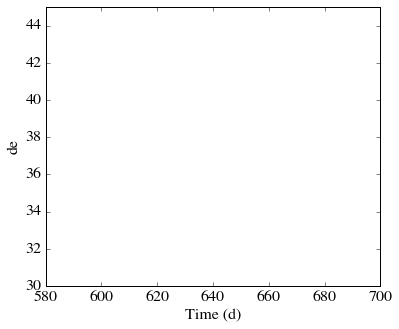

In [41]:
age=(h.star_age-2000)#*365.0
plt.plot(age,de)
plt.axis([580,700,30,45])
plt.xlabel(r'Time (d)')
plt.ylabel(r'de')
d_energy=10**de
print(np.sum(d_energy)) 




## Orbits

37 9
28


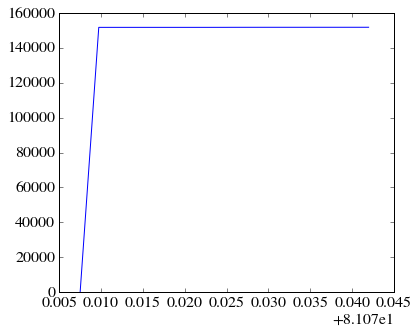

In [44]:
secyer=3600*24*365
rsun=6.955e10
r=h.R_Engulfed_Planet
vv=h.Orbital_velocity
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

#w=v/r*(1e5/rsun) # 1/s = Frequency -> T=2pi/w 
# Alpha = 
t=(h.star_age-h.star_age[0])*secyer
dt=(10**h.log_dt)*secyer
#plt.plot(r,v) # Orbital Velocity
#plt.plot(r,w*t) # Orbital Velocity
#plt.plot(r,f) # Destruction factor
# Arclength = v*dt

#plt.plot(t/secyer,distance/rsun) 
#plt.plot(t/secyer,distance/rsun)#/(2*np.pi*rsun))
# We need to isolate from 0 to 2300 etc (grazing + dynamical plunge)
# Mask

# Find dynamical engulfment phase
# End of phase (destruction)
i=0
while (f[i] <= 0.0):
    i=i+1
# Beginning of phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)):
    j=j+1
    
print(i,j)


distance=np.zeros(i-j)
distance[0]=0.0
k=1
while (k < i-j):
    distance[k] = distance[k-1]+(vv[k]*dt[k]*1e5)
    #print(dt[i],vv[i],distance[i]/rsun)
    k=k+1
print(k)

plt.plot(t[j:i]/secyer,distance/rsun)



    
# theta (rad) = 2pir / arclength = (2*np.pi*r*rsun)/  
#(2*np.pi*r*rsun)/(v*1d5)*dt

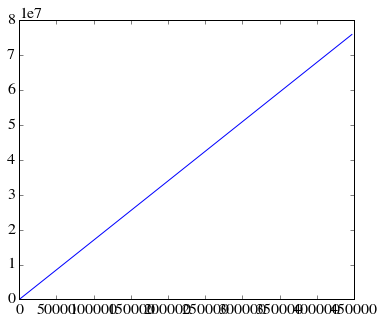

In [45]:
# Number of orbits per timesep 
age=(h.star_age)#*365.0
r=h.R_Engulfed_Planet*rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
plt.plot(age,orbits_dt)
#plt.axis([2645.9,2646.12,0,1]) # 

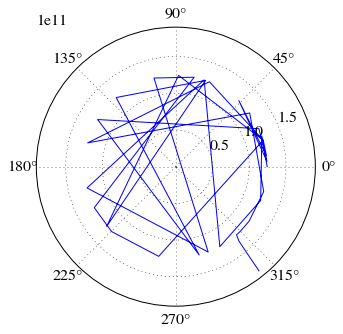

In [46]:
# 2*pi is the full circle. Theta needs to be in units of 2 pi 
# To calculate the angle in units of 2pi we need to add the contributions for every dt

#imin= 34 #start of dynamical phase
#imax= 66 # end of dynamical phase
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
#ax.plot(alpha,r)
ax.plot(alpha[34:400], r[34:400])
#print(area[34:100])
#print(alpha[34:100])

#print(area[0:100])
#print(alpha[0:100])

FILENAME = "figs/r_dynamicalphase_polar.pdf"
plt.savefig(FILENAME)
    

# Determine beginning of dynamical phase

In [47]:
DATA='./'
h = mr.MesaData(DATA+'history_r4.data')
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0] 
print(dyn_start)
print(dyn_end)


2
51


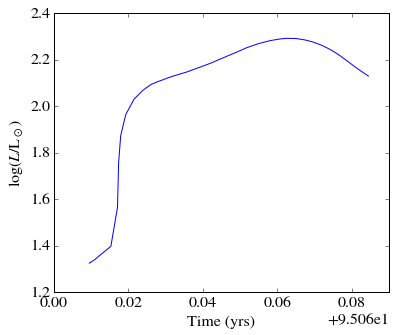

In [48]:
age=h.star_age
logl=h.log_L
plt.plot(age[dyn_start:dyn_end],logl[dyn_start:dyn_end])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
#FILENAME = "figs/Lightcurve.pdf"
#plt.savefig(FILENAME)

## Note: As we increase the radii of the star, the condition 0.02 Rstar is not that good anymore. What about 1/5 Rplanet?

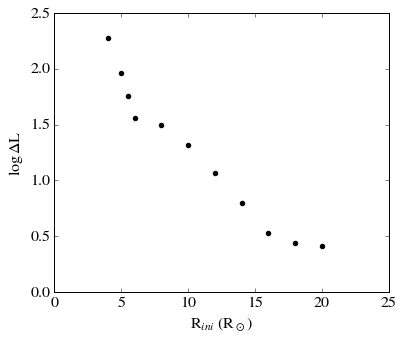

In [49]:
#radii=['4','6','8','10','12','14','16','18']
radii=[4,5,5.5,6,8,10,12,14,16,18,20]
i=0
for radius in radii:
    h = mr.MesaData(DATA+'history_r'+str(radius)+'.data')
    area=h.Engulfed_fraction
    age=h.star_age
    logl=h.log_L
    destruction=h.Log_Destruction_factor
    dyn_start=np.where(area > 0.999)[0][0]
    dyn_end=np.where(destruction > 0.0)[0][0]
    deltaL=np.log10(max(10**logl)-min(10**logl))
    deltaT=(age[dyn_end]-age[dyn_start])*365
    #print(np.log10(max(10**logl)-min(10**logl)))
    #print((age[dyn_end]-age[dyn_start])*365)
    plt.scatter(radius,deltaL,color='black')
plt.xlabel(r'R$_{ini}$ (R$_\odot$)')
plt.ylabel(r'$\log \,\Delta $L ') 
FILENAME = "figs/delta_L.pdf"
plt.savefig(FILENAME)    

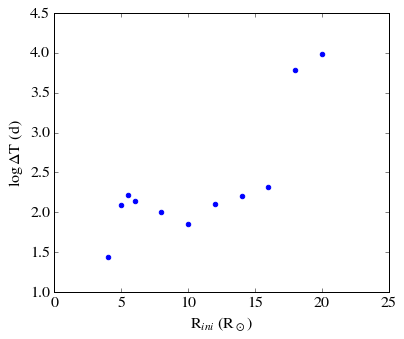

In [50]:
i=0
for radius in radii:
    h = mr.MesaData(DATA+'history_r'+str(radius)+'.data')
    area=h.Engulfed_fraction
    age=h.star_age
    logl=h.log_L
    destruction=h.Log_Destruction_factor
    dyn_start=np.where(area > 0.999)[0][0]
    dyn_end=np.where(destruction > 0.0)[0][0]
    deltaL=np.log10(max(10**logl)-min(10**logl))
    deltaT=(age[dyn_end]-age[dyn_start])*365
    #print(np.log10(max(10**logl)-min(10**logl)))
    #print((age[dyn_end]-age[dyn_start])*365)
    plt.scatter(radius,np.log10(deltaT),color='blue')
plt.xlabel(r'R$_{ini}$ (R$_\odot$)')
plt.ylabel(r'$\log \,\Delta $T (d)') 
FILENAME = "figs/delta_T.pdf"
plt.savefig(FILENAME)    

[0, 170, 1.4, 2.35]

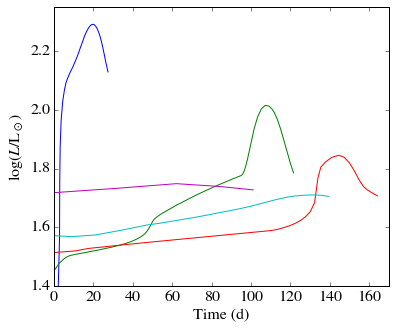

In [51]:
radii=[4,5,5.5,6,8]


i=0
for radius in radii:
    h = mr.MesaData(DATA+'history_r'+str(radius)+'.data')
    area=h.Engulfed_fraction
    age=h.star_age
    logl=h.log_L
    destruction=h.Log_Destruction_factor
    dyn_start=np.where(area > 0.999)[0][0]
    dyn_end=np.where(destruction > 0.0)[0][0]
    days=(age[dyn_start:dyn_end]-age[dyn_start])*365.0
    plt.plot(days,logl[dyn_start:dyn_end])
plt.xlabel(r'Time (d)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.axis([0,170,1.4,2.35])

#FILENAME = "figs/delta_L.pdf"
#plt.savefig(FILENAME)    

[2657.1589969730367, 2657.2021471223952]
Reading profile data
Reading history data
Constructing mixing regions
there are 30 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x1069629b0>, histories=[<mesa_data.Mesa_Data object at 0x112b8e358>], xlims=(1.0, 2250.0))

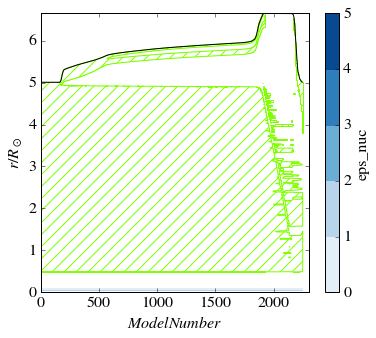

In [52]:
import mkipp
h = mr.MesaData('./1.0_energy_injection_runs/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "model_number",yaxis='radius'),xlims = [0,2300])


#mkipp.kipp_plot(mkipp.Kipp_Args(save_filename = "Kippenhahn2.png"), xlims = [300,600])